/var/folders/c3/k_kn5fhx6jlbll23x_s6_8tc0000gn/T/ipykernel_91681/550570319.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='scenario', y='cost', palette='Set2')


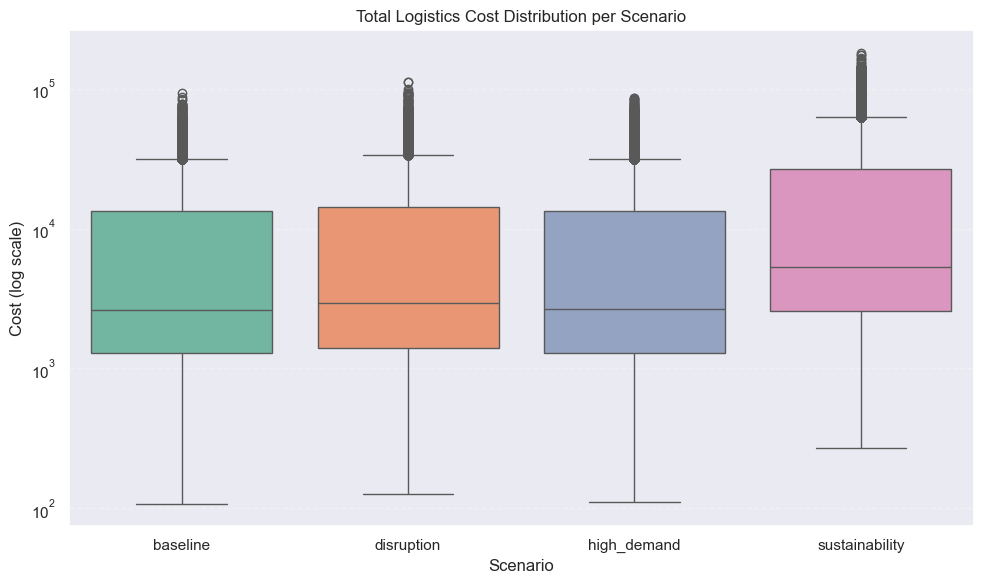

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load all scenario datasets into one DataFrame
base_path = "../src/synthetic_data/data/processed/"

files = {
    "baseline": "synthetic_logistics_data_baseline.csv",
    "disruption": "synthetic_logistics_data_disruption.csv",
    "high_demand": "synthetic_logistics_data_high_demand.csv",
    "sustainability": "synthetic_logistics_data_sustainability.csv"
}

df_list = []
for scenario, filename in files.items():
    df = pd.read_csv(base_path + filename)
    df['scenario'] = scenario
    df_list.append(df)

df_all = pd.concat(df_list, ignore_index=True)

# Plot cost distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x='scenario', y='cost', palette='Set2')
plt.yscale('log')
plt.title("Total Logistics Cost Distribution per Scenario")
plt.ylabel("Cost (log scale)")
plt.xlabel("Scenario")
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()


/var/folders/c3/k_kn5fhx6jlbll23x_s6_8tc0000gn/T/ipykernel_91681/526317892.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="scenario", y="co2_emissions", palette="Set1")
/var/folders/c3/k_kn5fhx6jlbll23x_s6_8tc0000gn/T/ipykernel_91681/526317892.py:30: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/VAE_GAN_Logistics_Framework/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


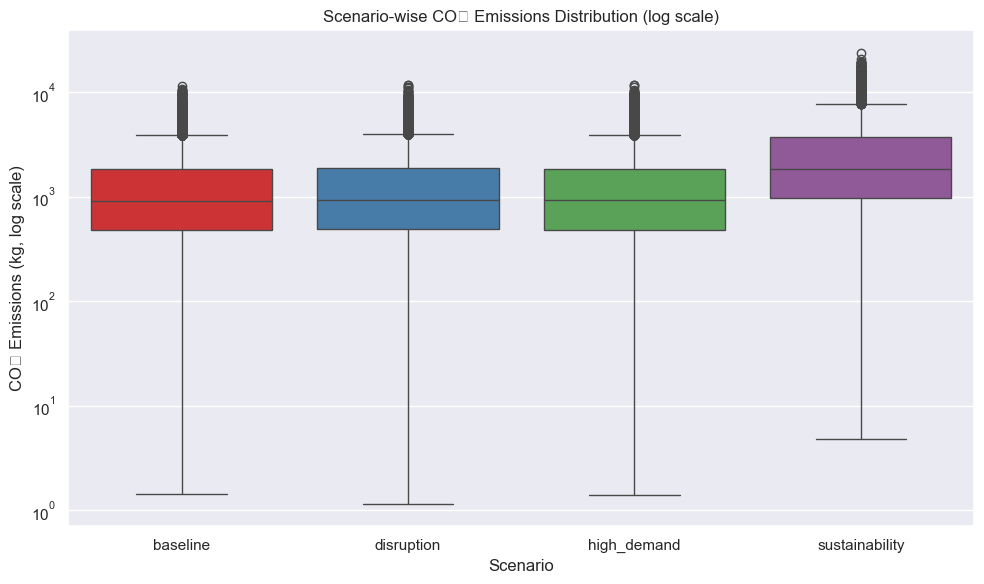

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load all scenario CSVs and add labels
paths = {
    "baseline": "../src/synthetic_data/data/processed/synthetic_logistics_data_baseline.csv",
    "disruption": "../src/synthetic_data/data/processed/synthetic_logistics_data_disruption.csv",
    "high_demand": "../src/synthetic_data/data/processed/synthetic_logistics_data_high_demand.csv",
    "sustainability": "../src/synthetic_data/data/processed/synthetic_logistics_data_sustainability.csv"
}

dfs = []
for label, path in paths.items():
    df = pd.read_csv(path)
    df["scenario"] = label
    dfs.append(df)

# Concatenate all data
df_all = pd.concat(dfs)

# Plot: Boxplot of CO2 emissions by scenario (log scale)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x="scenario", y="co2_emissions", palette="Set1")
plt.yscale("log")
plt.title("Scenario-wise CO₂ Emissions Distribution (log scale)")
plt.ylabel("CO₂ Emissions (kg, log scale)")
plt.xlabel("Scenario")
plt.tight_layout()

plt.show()


Available columns: ['shipment_id', 'timestamp', 'day_of_week', 'hour_of_day', 'origin', 'lat_origin', 'lon_origin', 'destination', 'lat_destination', 'lon_destination', 'intermediate', 'lat_intermediate', 'lon_intermediate', 'transport_mode', 'route', 'distance', 'volume', 'transit_time', 'cost', 'co2_emissions', 'carrier', 'port_origin', 'port_destination', 'airport_origin', 'airport_destination', 'weather_condition', 'weather_severity', 'traffic_congestion', 'port_congestion', 'disruption_indicator', 'capacity_modifier', 'scenario', 'multi_leg']


/var/folders/c3/k_kn5fhx6jlbll23x_s6_8tc0000gn/T/ipykernel_91681/681263589.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='scenario', y='cost', palette='Set2')


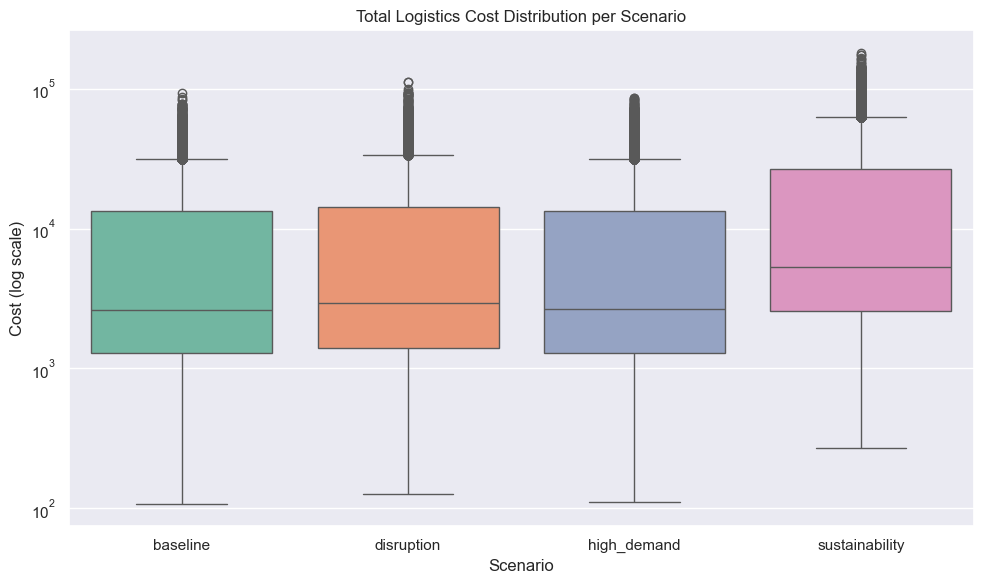

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Correct path (from notebooks/)
df = pd.read_csv("../src/synthetic_data/data/processed/synthetic_logistics_data_cleaned.csv")

# ✅ Preview to confirm available columns
print("Available columns:", df.columns.tolist())

# ✅ Optional: Calculate cost per ton-km if needed
if 'cost_per_tonkm' not in df.columns and all(col in df.columns for col in ['cost', 'distance', 'volume']):
    df['cost_per_tonkm'] = df['cost'] / (df['distance'] * df['volume'])
    df = df.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['cost_per_tonkm'])

# ✅ Sanity check
assert 'scenario' in df.columns
assert 'cost' in df.columns

# ✅ Plot: Boxplot of Total Cost per Scenario
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='scenario', y='cost', palette='Set2')
plt.yscale('log')
plt.title("Total Logistics Cost Distribution per Scenario")
plt.ylabel("Cost (log scale)")
plt.xlabel("Scenario")
plt.tight_layout()

plt.show()


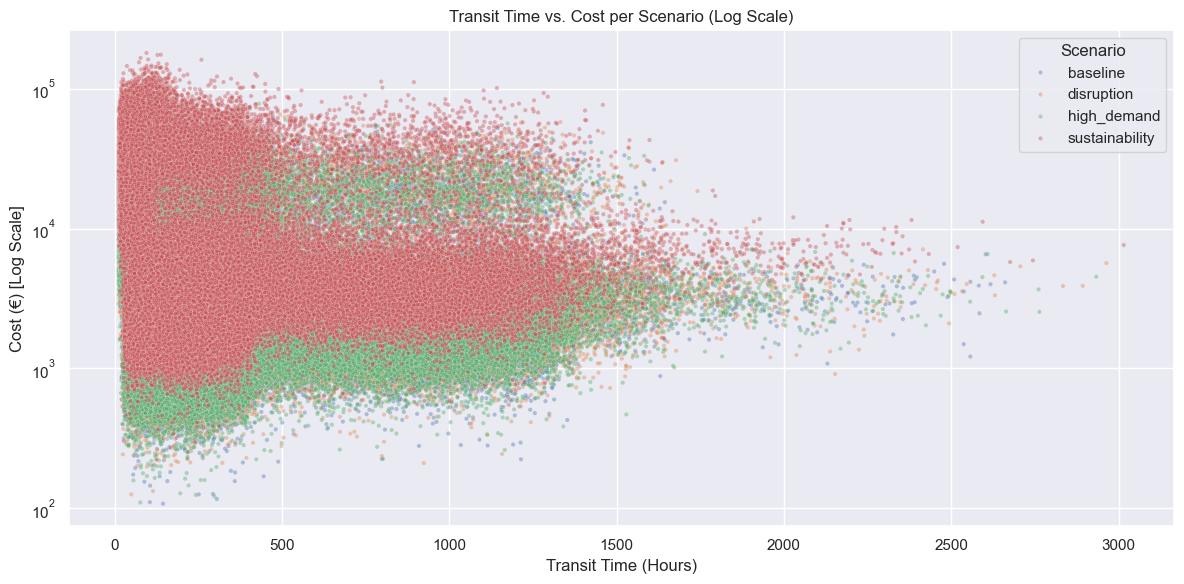

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (correct relative path from notebook directory)
df = pd.read_csv("../src/synthetic_data/data/processed/synthetic_logistics_data_cleaned.csv")

# Verify required columns exist
required_cols = ['scenario', 'transit_time', 'cost']
for col in required_cols:
    assert col in df.columns, f"Missing column: {col}"

# Set dark theme
sns.set(style="darkgrid")

# Create scatter plot with log-scaled cost axis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='transit_time', y='cost', hue='scenario', alpha=0.4, s=10)

# Log scale for Y-axis (cost)
plt.yscale('log')
plt.title("Transit Time vs. Cost per Scenario (Log Scale)")
plt.xlabel("Transit Time (Hours)")
plt.ylabel("Cost (€) [Log Scale]")
plt.legend(title='Scenario')
plt.tight_layout()

# Save figure

plt.show()


/var/folders/c3/k_kn5fhx6jlbll23x_s6_8tc0000gn/T/ipykernel_91681/2047934614.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='scenario', y='emission_intensity', palette='Set2')
/var/folders/c3/k_kn5fhx6jlbll23x_s6_8tc0000gn/T/ipykernel_91681/2047934614.py:26: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/VAE_GAN_Logistics_Framework/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


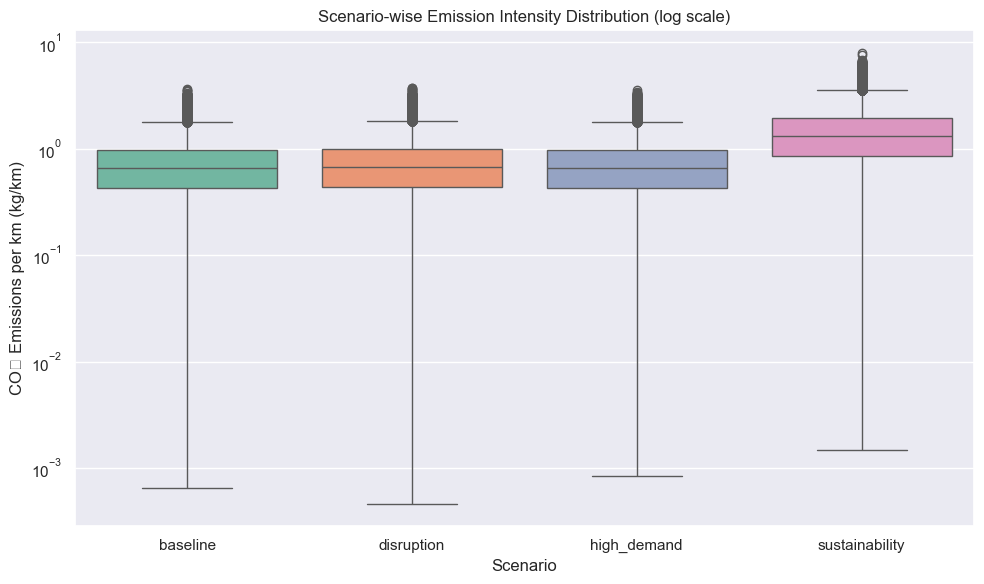

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset (correct path for notebook in /notebooks)
df = pd.read_csv("../src/synthetic_data/data/processed/synthetic_logistics_data_cleaned.csv")

# Verify required columns exist
assert 'scenario' in df.columns
assert 'co2_emissions' in df.columns
assert 'distance' in df.columns

# Compute emission intensity (kg/km)
df['emission_intensity'] = df['co2_emissions'] / df['distance']
df = df[df['emission_intensity'].notnull() & np.isfinite(df['emission_intensity'])]

# Plot settings
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.boxplot(data=df, x='scenario', y='emission_intensity', palette='Set2')
plt.yscale('log')
plt.title("Scenario-wise Emission Intensity Distribution (log scale)")
plt.ylabel("CO₂ Emissions per km (kg/km)")
plt.xlabel("Scenario")
plt.tight_layout()

plt.show()
